In [75]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta, datetime

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates
start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
dates = [start_date + timedelta(days=i) for i in range(1000)]

# Generate features
def generate_rental_data(n=1000):
    data = {
        "Rental_ID": [f"RNT{1000+i}" for i in range(n)],
        "Date": dates[:n],
        "Car_Type": np.random.choice(['SUV', 'Sedan', 'Hatchback', 'Convertible', 'Pickup'], size=n),
        "Rental_Duration": np.random.normal(5, 2, n).round(1),  # in days
        "Customer_Age": np.random.randint(21, 70, n),
        "Distance_Travelled": np.random.normal(300, 100, n).round(1),  # in km
        "Fuel_Used": np.random.normal(30, 10, n).round(1),  # in liters
        "City": np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'], size=n),
        "Weather_Condition": np.random.choice(['Clear', 'Rainy', 'Snowy', 'Cloudy'], size=n),
        "Accident_History": np.random.choice(['Yes', 'No'], size=n),
        "Rental_Cost": np.random.normal(500, 150, n).round(2)  # target variable
    }
    df = pd.DataFrame(data)

    # Introduce missing values
    for col in ['Customer_Age', 'Fuel_Used', 'Distance_Travelled']:
        df.loc[df.sample(frac=0.05).index, col] = np.nan

    # Introduce duplicate rows
    df = pd.concat([df, df.sample(20)], ignore_index=True)

    # Introduce outliers
    outlier_indices = np.random.choice(df.index, 10, replace=False)
    df.loc[outlier_indices, 'Rental_Cost'] *= 4

    return df

df_rental = generate_rental_data(1000)

# Save to Excel
file_path = "rental_car_data_with_eda_issues.xlsx"
df_rental.to_excel(file_path, index=False)

file_path


'rental_car_data_with_eda_issues.xlsx'

## ✅ 1.1 Load the Data

In [76]:
import pandas as pd

df = pd.read_excel("rental_car_data_with_eda_issues.xlsx")  # adjust path if needed


## ✅ 1.2 Preview the Datase

In [77]:
df.head()


,Rental_ID,Date,Car_Type,Rental_Duration,Customer_Age,Distance_Travelled,Fuel_Used,City,Weather_Condition,Accident_History,Rental_Cost
0,RNT1000,2023-01-01,Convertible,5.2,26.0,353.7,32.5,Houston,Cloudy,No,612.54
1,RNT1001,2023-01-02,Pickup,6.5,59.0,305.2,18.1,Chicago,Cloudy,Yes,372.54
2,RNT1002,2023-01-03,Hatchback,6.0,43.0,279.4,36.1,New York,Clear,No,620.89
3,RNT1003,2023-01-04,Pickup,5.4,45.0,235.0,37.1,Los Angeles,Clear,Yes,435.89
4,RNT1004,2023-01-05,Pickup,3.4,63.0,233.8,28.3,New York,Rainy,Yes,381.49


## ✅ 1.3 Basic Info

In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rental_ID           1020 non-null   object        
 1   Date                1020 non-null   datetime64[ns]
 2   Car_Type            1020 non-null   object        
 3   Rental_Duration     1020 non-null   float64       
 4   Customer_Age        969 non-null    float64       
 5   Distance_Travelled  970 non-null    float64       
 6   Fuel_Used           970 non-null    float64       
 7   City                1020 non-null   object        
 8   Weather_Condition   1020 non-null   object        
 9   Accident_History    1020 non-null   object        
 10  Rental_Cost         1020 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 87.8+ KB


## ✅ 1.4 Shape and Columns

In [79]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (1020, 11)
Columns: ['Rental_ID', 'Date', 'Car_Type', 'Rental_Duration', 'Customer_Age', 'Distance_Travelled', 'Fuel_Used', 'City', 'Weather_Condition', 'Accident_History', 'Rental_Cost']


## ✅ 1.5 Summary Statistics

In [80]:
df.describe(include='all')


,Rental_ID,Date,Car_Type,Rental_Duration,Customer_Age,Distance_Travelled,Fuel_Used,City,Weather_Condition,Accident_History,Rental_Cost
count,1020,1020,1020,1020.000000,969.000000,970.000000,970.000000,1020,1020,1020,1020.000000
unique,1000,NaN,5,NaN,NaN,NaN,NaN,5,4,2,NaN
top,RNT1911,NaN,SUV,NaN,NaN,NaN,NaN,Los Angeles,Snowy,Yes,NaN
freq,2,NaN,214,NaN,NaN,NaN,NaN,224,271,516,NaN
mean,NaN,2024-05-15 02:07:03.529411840,NaN,5.144216,45.629515,296.849588,30.185979,NaN,NaN,NaN,521.438167
min,NaN,2023-01-01 00:00:00,NaN,-0.800000,21.000000,-47.100000,1.000000,NaN,NaN,NaN,40.330000
25%,NaN,2023-09-08 18:00:00,NaN,3.800000,33.000000,231.025000,23.500000,NaN,NaN,NaN,405.227500
50%,NaN,2024-05-16 12:00:00,NaN,5.100000,46.000000,297.300000,30.050000,NaN,NaN,NaN,504.425000
75%,NaN,2025-01-20 06:00:00,NaN,6.400000,58.000000,365.500000,37.100000,NaN,NaN,NaN,604.890000
max,NaN,2025-09-26 00:00:00,NaN,11.400000,69.000000,606.200000,57.700000,NaN,NaN,NaN,2963.840000


## 🔍 Step 2: Handling Missing Values
Would you like to:

🧼 Drop rows with missing values?

🛠️ Impute (fill) missing values with mean/median/mode?

## 🔍 Step 2: Handling Missing Values

In [81]:
df.isnull().sum()


,0
Rental_ID,0
Date,0
Car_Type,0
Rental_Duration,0
Customer_Age,51
Distance_Travelled,50
Fuel_Used,50
City,0
Weather_Condition,0
Accident_History,0


<Axes: >

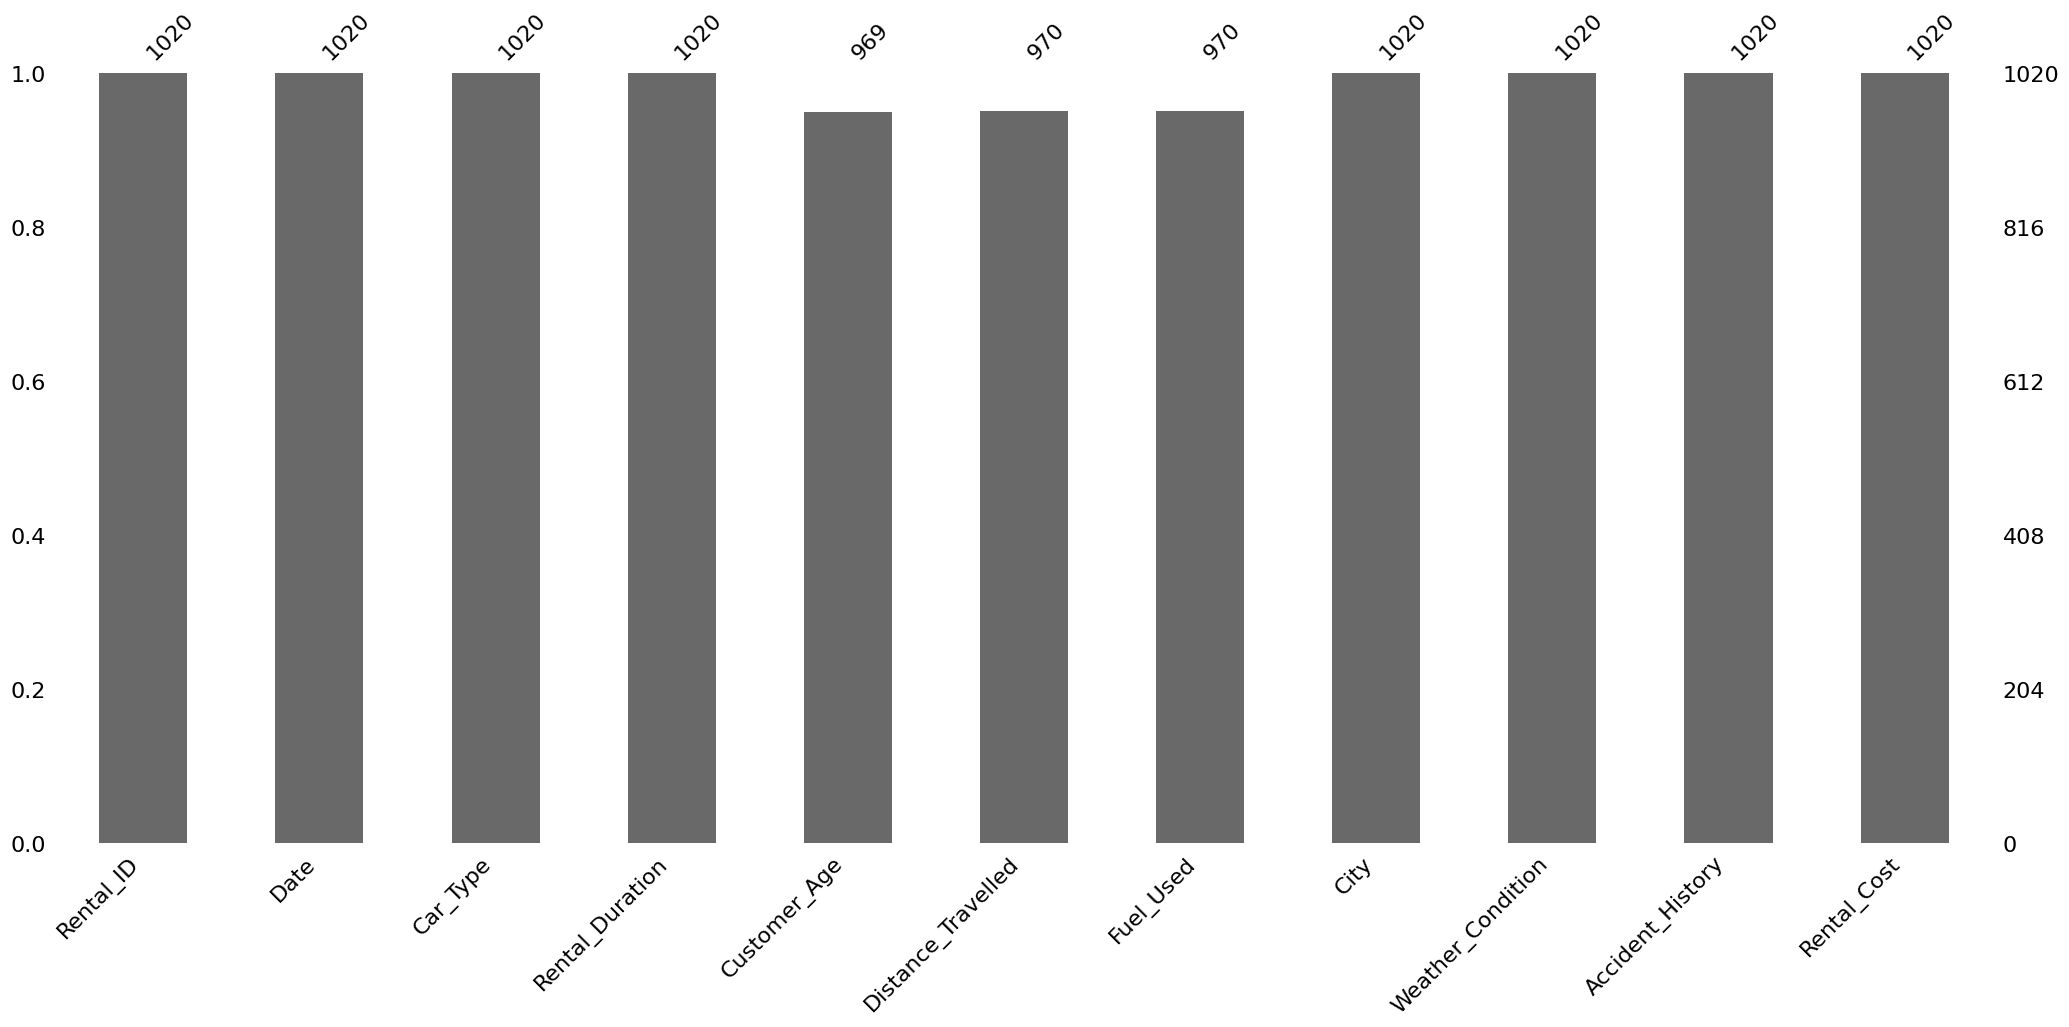

In [82]:
import missingno
missingno.bar(df)

## ✅ 2.3 Impute Missing Values

In [83]:
# Fill missing values
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Fuel_Used'].fillna(df['Fuel_Used'].mean(), inplace=True)
df['Distance_Travelled'].fillna(df['Distance_Travelled'].median(), inplace=True)


/tmp/ipython-input-83-1929641671.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
/tmp/ipython-input-83-1929641671.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

## ✅ 2.4 Verify Again

In [84]:
df.isnull().sum()

,0
Rental_ID,0
Date,0
Car_Type,0
Rental_Duration,0
Customer_Age,0
Distance_Travelled,0
Fuel_Used,0
City,0
Weather_Condition,0
Accident_History,0


In [85]:
import missingno

<Axes: >

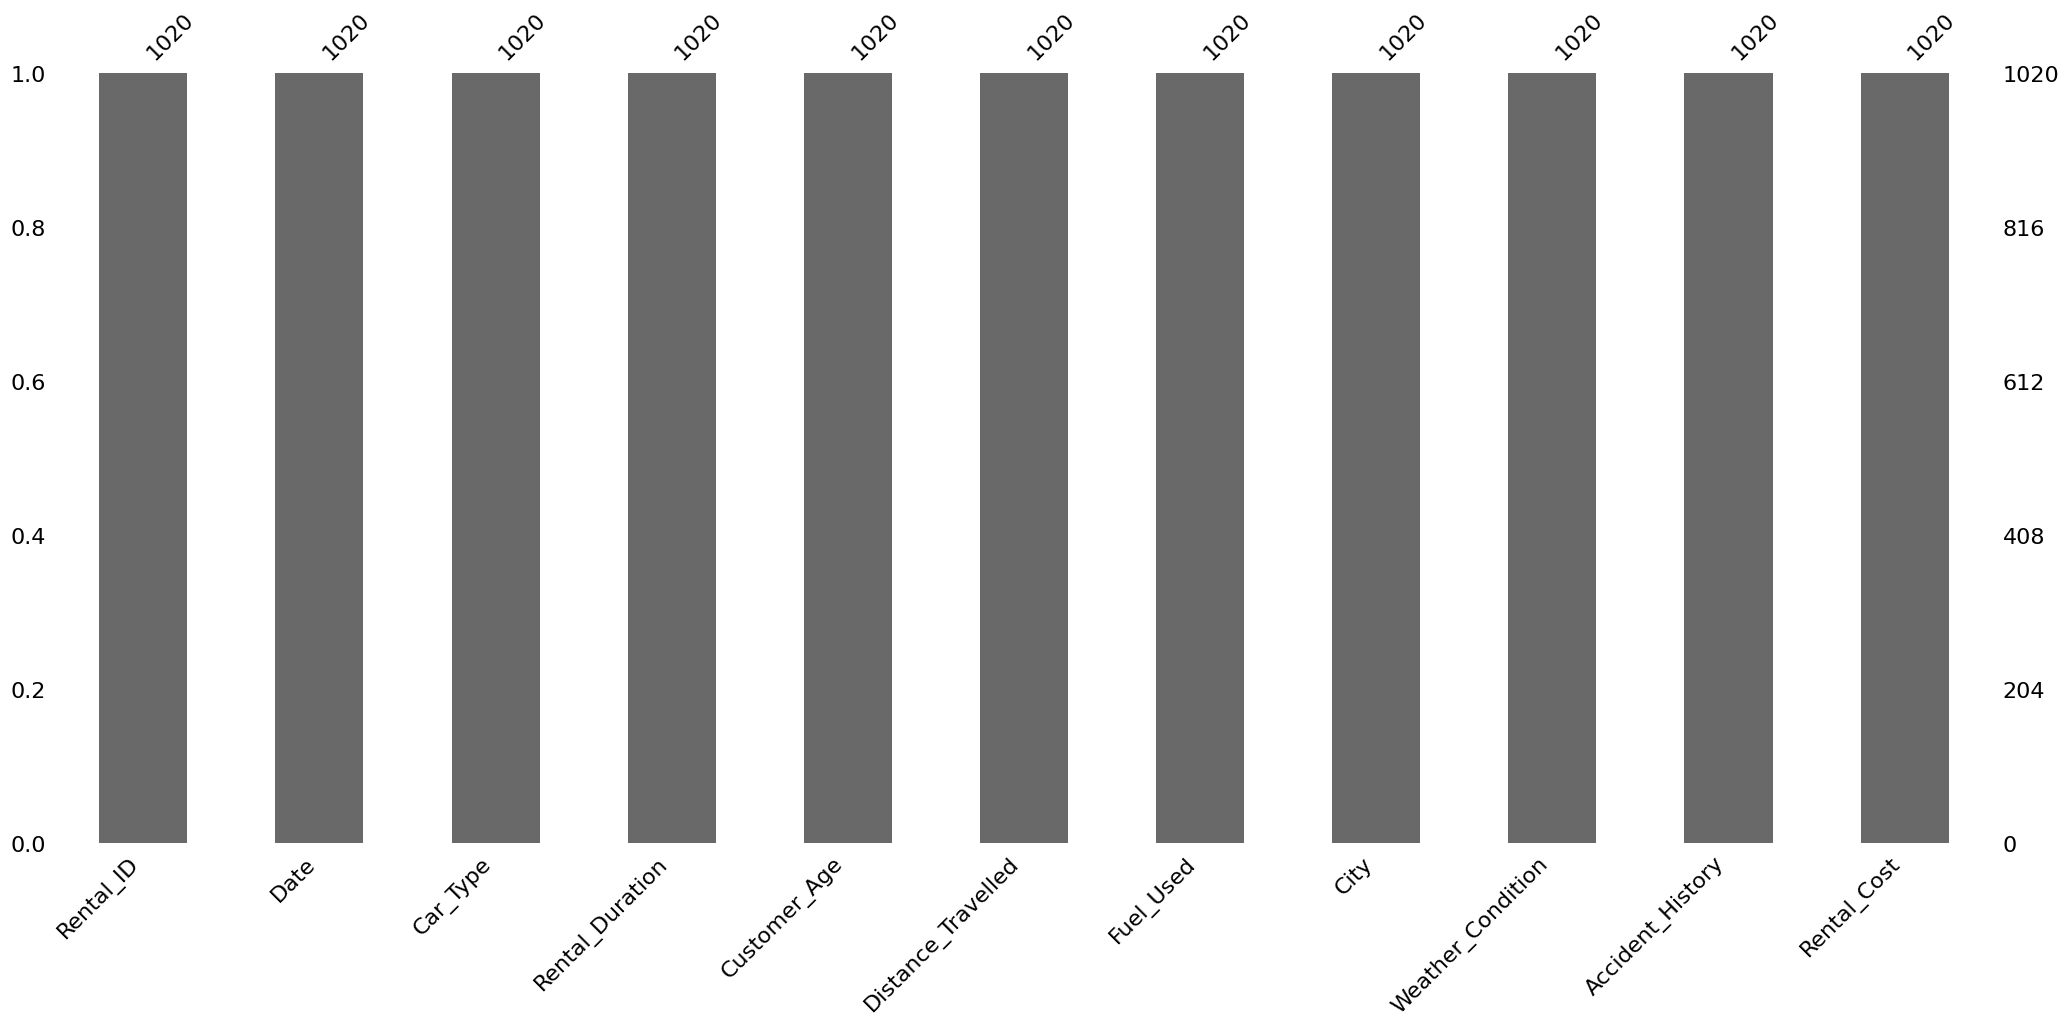

In [86]:
missingno.bar(df)

## 🔁 Step 3: Handling Duplicate Rows

## ✅ 3.2 View Duplicate Rows (Optional

In [87]:
df[df.duplicated()]

,Rental_ID,Date,Car_Type,Rental_Duration,Customer_Age,Distance_Travelled,Fuel_Used,City,Weather_Condition,Accident_History,Rental_Cost
1000,RNT1777,2025-02-16,Pickup,5.3,46.0,220.1,42.1,Houston,Clear,Yes,583.21
1001,RNT1402,2024-02-07,SUV,4.4,61.0,266.4,30.6,Houston,Snowy,Yes,603.08
1002,RNT1327,2023-11-24,Pickup,4.8,59.0,300.4,31.0,Los Angeles,Cloudy,Yes,524.02
1003,RNT1967,2025-08-25,Pickup,5.1,36.0,291.8,44.2,New York,Snowy,Yes,486.93
1004,RNT1546,2024-06-30,Pickup,2.2,33.0,476.9,19.8,Chicago,Snowy,Yes,481.21
1005,RNT1066,2023-03-08,Sedan,4.0,48.0,230.4,21.9,Chicago,Clear,Yes,367.05
1006,RNT1586,2024-08-09,Convertible,5.2,25.0,189.7,28.8,New York,Rainy,Yes,434.74
1007,RNT1911,2025-06-30,Hatchback,8.1,55.0,274.4,44.3,Chicago,Rainy,Yes,608.18
1008,RNT1545,2024-06-29,Pickup,9.6,69.0,475.5,22.7,New York,Snowy,Yes,356.56
1009,RNT1560,2024-07-14,SUV,1.6,41.0,293.4,32.1,New York,Rainy,No,606.47


## ✅ 3.3 Remove Duplicate Rows

In [88]:
df.drop_duplicates(inplace=True)


## ✅ 3.4 Confirm Again



In [89]:
df.duplicated().sum()


np.int64(0)

## ⚠️ Step 4: Outlier Detection & Handling

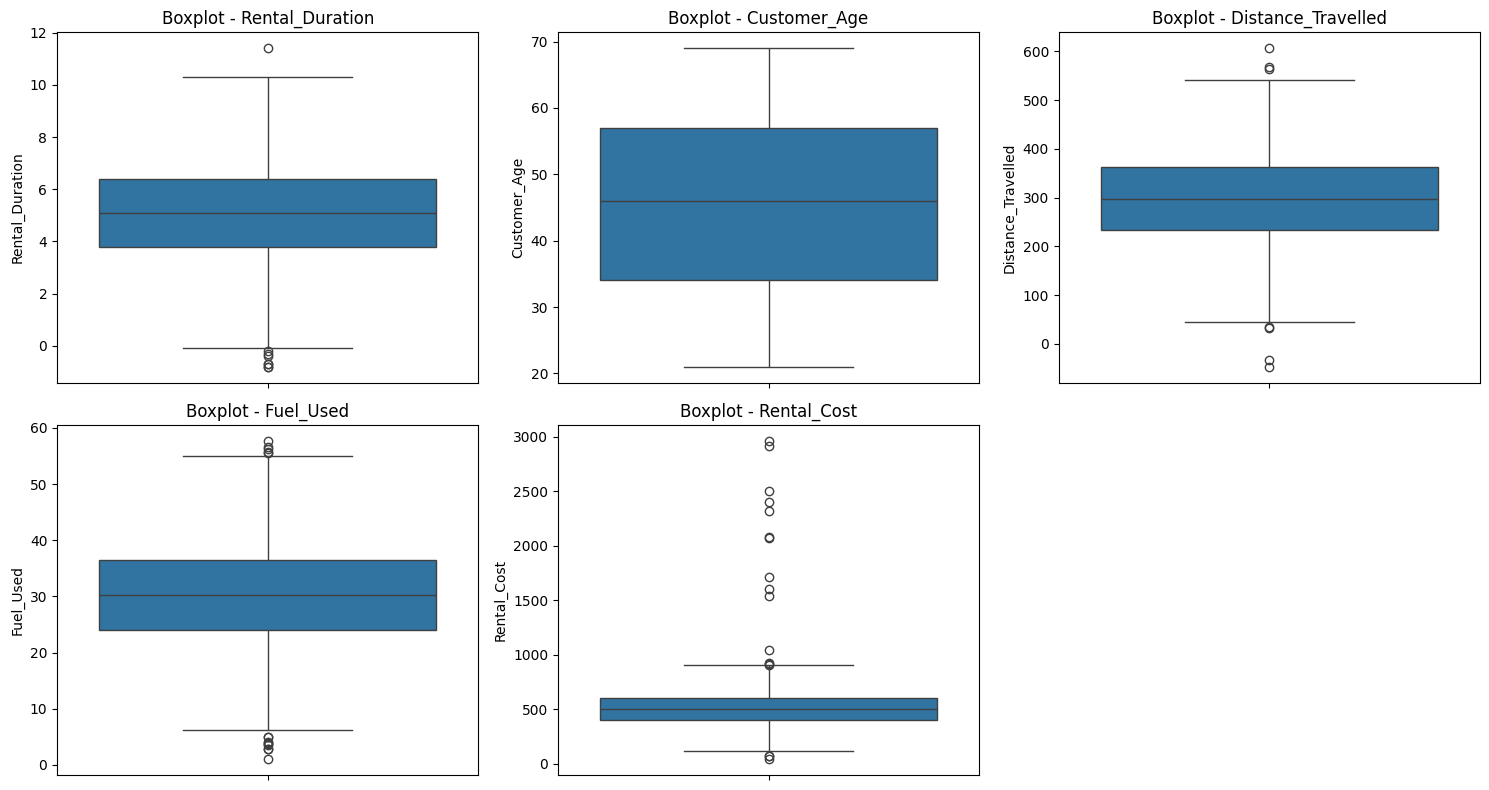

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Rental_Duration', 'Customer_Age', 'Distance_Travelled', 'Fuel_Used', 'Rental_Cost']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()


## ✅ 4.3 Programmatically Detect Outliers (IQR Method)
Let’s list outliers using the Interquartile Range (IQR) method:

In [91]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example for Rental_Cost
outliers_cost = find_outliers_iqr(df, 'Rental_Cost')
print(f"Number of outliers in Rental_Cost: {len(outliers_cost)}")


Number of outliers in Rental_Cost: 17


## ✅ 4.4 Handling Outliers
Options:

❌ Drop them (if few and extreme)

🔧 Cap them (use IQR boundaries)

✅ Keep them (if they're genuine and frequent in real-world)

In [92]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap values
    df[column] = df[column].apply(lambda x: lower if x < lower else upper if x > upper else x)
    return df

# Apply capping
for col in ['Rental_Duration', 'Customer_Age', 'Distance_Travelled', 'Fuel_Used', 'Rental_Cost']:
    df = cap_outliers(df, col)


## ✅ 4.6 Verify Outliers Removed (Optional)

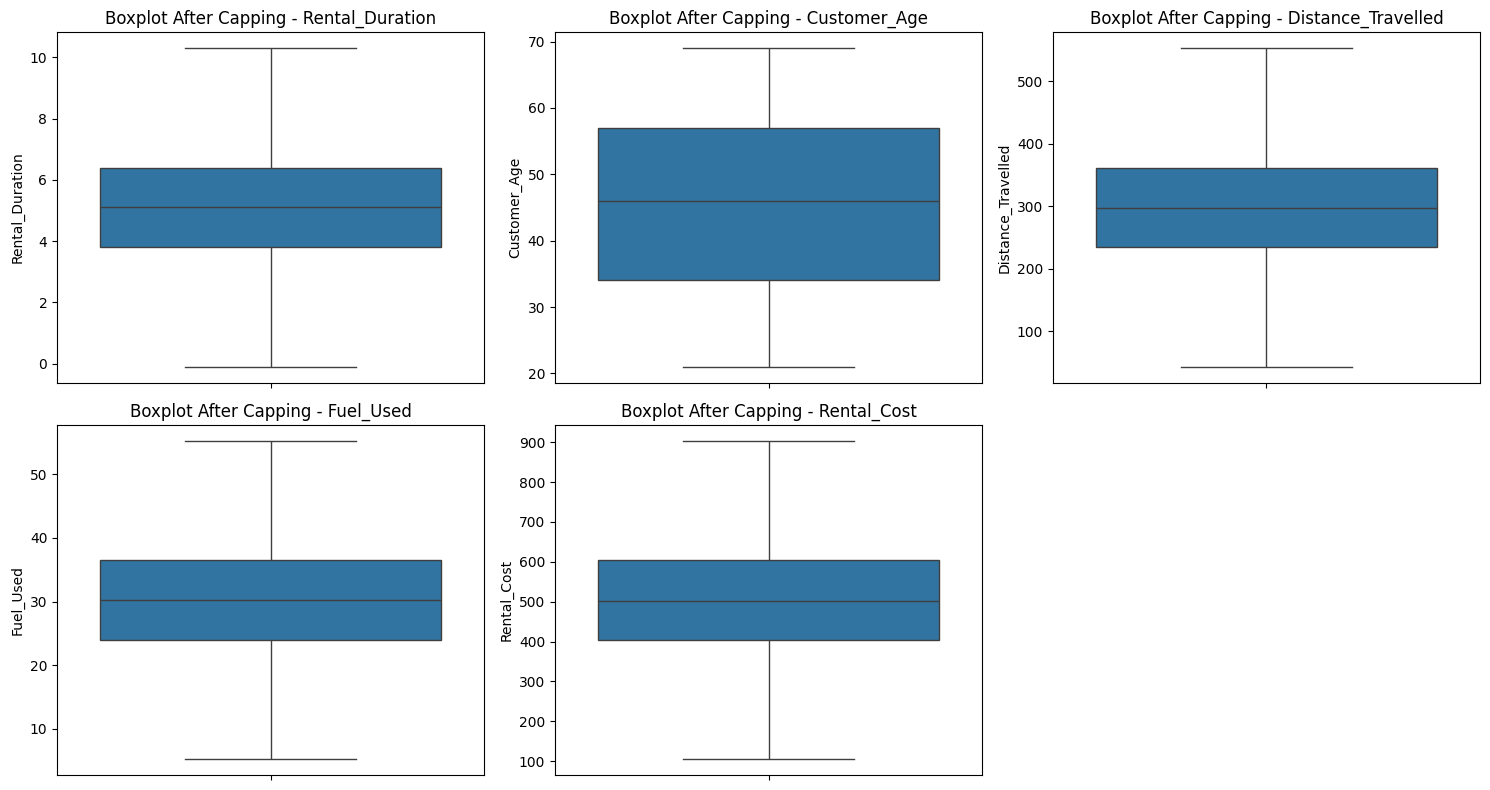

In [93]:
# Plot boxplots again to confirm
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot After Capping - {col}")
plt.tight_layout()
plt.show()


## 🧠 Step 5: Feature Encoding
Since this is a regression task, we want to convert categorical variables into numeric format without introducing bias or losing information.

In [94]:
from sklearn.preprocessing import LabelEncoder

# Label Encode binary column
le = LabelEncoder()
df['Accident_History'] = le.fit_transform(df['Accident_History'])

# One-Hot Encode remaining categoricals
df = pd.get_dummies(df, columns=['Car_Type', 'City', 'Weather_Condition'], drop_first=True)


## ✅ 5.4 Confirm Encoding Done

In [95]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1011
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rental_ID                 1001 non-null   object        
 1   Date                      1001 non-null   datetime64[ns]
 2   Rental_Duration           1001 non-null   float64       
 3   Customer_Age              1001 non-null   float64       
 4   Distance_Travelled        1001 non-null   float64       
 5   Fuel_Used                 1001 non-null   float64       
 6   Accident_History          1001 non-null   int64         
 7   Rental_Cost               1001 non-null   float64       
 8   Car_Type_Hatchback        1001 non-null   bool          
 9   Car_Type_Pickup           1001 non-null   bool          
 10  Car_Type_SUV              1001 non-null   bool          
 11  Car_Type_Sedan            1001 non-null   bool          
 12  City_Houston             

## 📏 Step 6: Feature Scaling

Feature scaling is critical in regression because:

Features with different units (e.g., age in years vs. distance in km) can bias the model.

Scaling ensures all features contribute fairly.

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Columns to scale
scale_cols = ['Rental_Duration', 'Customer_Age', 'Distance_Travelled', 'Fuel_Used']

# Scale and replace
df[scale_cols] = scaler.fit_transform(df[scale_cols])


## ✅ 6.4 Confirm Scaling Done

In [97]:
df[scale_cols].describe()


,Rental_Duration,Customer_Age,Distance_Travelled,Fuel_Used
count,1.001000e+03,1.001000e+03,1.001000e+03,1.001000e+03
mean,-4.081539e-16,-1.322064e-16,-1.916549e-16,-2.794967e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.627830e+00,-1.794297e+00,-2.691847e+00,-2.594454e+00
25%,-6.724721e-01,-8.482582e-01,-6.667434e-01,-6.463988e-01
50%,-2.068606e-02,2.500864e-02,3.496095e-04,-3.698501e-03
75%,6.311000e-01,8.255032e-01,6.833258e-01,6.523048e-01
max,2.586458e+00,1.698770e+00,2.708430e+00,2.600360e+00


In [98]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} unique values: {df[col].unique()}")


Rental_ID unique values: ['RNT1000' 'RNT1001' 'RNT1002' 'RNT1003' 'RNT1004' 'RNT1005' 'RNT1006'
 'RNT1007' 'RNT1008' 'RNT1009' 'RNT1010' 'RNT1011' 'RNT1012' 'RNT1013'
 'RNT1014' 'RNT1015' 'RNT1016' 'RNT1017' 'RNT1018' 'RNT1019' 'RNT1020'
 'RNT1021' 'RNT1022' 'RNT1023' 'RNT1024' 'RNT1025' 'RNT1026' 'RNT1027'
 'RNT1028' 'RNT1029' 'RNT1030' 'RNT1031' 'RNT1032' 'RNT1033' 'RNT1034'
 'RNT1035' 'RNT1036' 'RNT1037' 'RNT1038' 'RNT1039' 'RNT1040' 'RNT1041'
 'RNT1042' 'RNT1043' 'RNT1044' 'RNT1045' 'RNT1046' 'RNT1047' 'RNT1048'
 'RNT1049' 'RNT1050' 'RNT1051' 'RNT1052' 'RNT1053' 'RNT1054' 'RNT1055'
 'RNT1056' 'RNT1057' 'RNT1058' 'RNT1059' 'RNT1060' 'RNT1061' 'RNT1062'
 'RNT1063' 'RNT1064' 'RNT1065' 'RNT1066' 'RNT1067' 'RNT1068' 'RNT1069'
 'RNT1070' 'RNT1071' 'RNT1072' 'RNT1073' 'RNT1074' 'RNT1075' 'RNT1076'
 'RNT1077' 'RNT1078' 'RNT1079' 'RNT1080' 'RNT1081' 'RNT1082' 'RNT1083'
 'RNT1084' 'RNT1085' 'RNT1086' 'RNT1087' 'RNT1088' 'RNT1089' 'RNT1090'
 'RNT1091' 'RNT1092' 'RNT1093' 'RNT1094' 'RNT1095' '

## 🎯 Step 7: Feature Selection
Now that your data is cleaned, encoded, and scaled — let's select the most impactful features for the regression model. This improves model performance and reduces noise.

In [99]:
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['Rental_ID', 'Date'])

# Show correlation with target
correlation_with_target = df_numeric.corr()['Rental_Cost'].sort_values(ascending=False)
print(correlation_with_target)

Rental_Cost                 1.000000
Car_Type_SUV                0.045623
City_Houston                0.041850
Accident_History            0.033385
Distance_Travelled          0.031690
City_Los Angeles            0.027436
Car_Type_Hatchback          0.016961
Customer_Age                0.013603
Weather_Condition_Rainy     0.006878
Weather_Condition_Snowy    -0.001460
City_New York              -0.003414
Rental_Duration            -0.015611
Weather_Condition_Cloudy   -0.017680
Fuel_Used                  -0.024726
Car_Type_Pickup            -0.032475
Car_Type_Sedan             -0.038026
City_Miami                 -0.060460
Name: Rental_Cost, dtype: float64


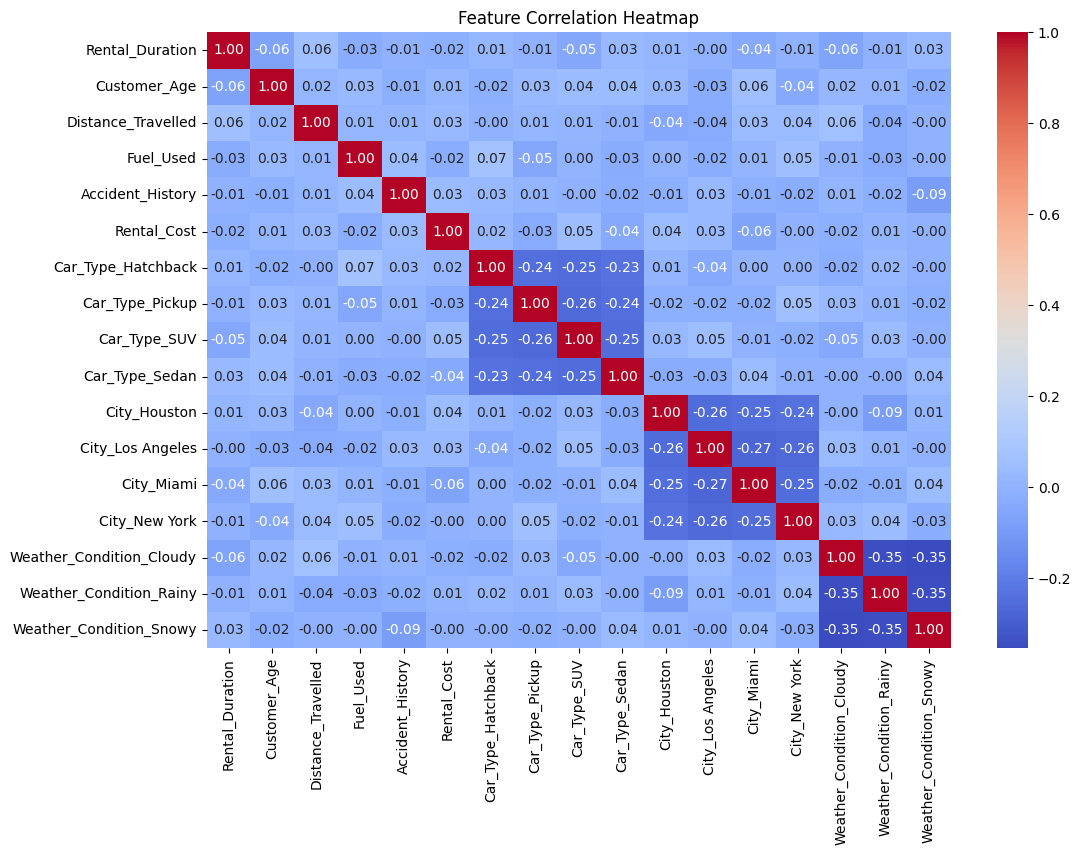

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['Rental_ID', 'Date'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 📊 Step 8: Data Visualization

## ✅ 8.1 Distribution Plots (Understand Data Shape)
These plots help identify skewness, outliers, and data spread.

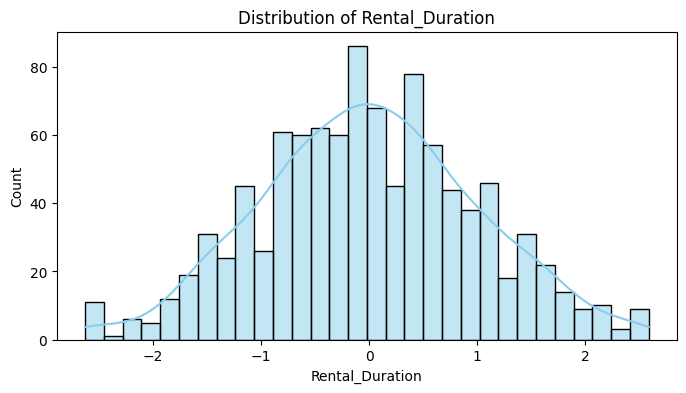

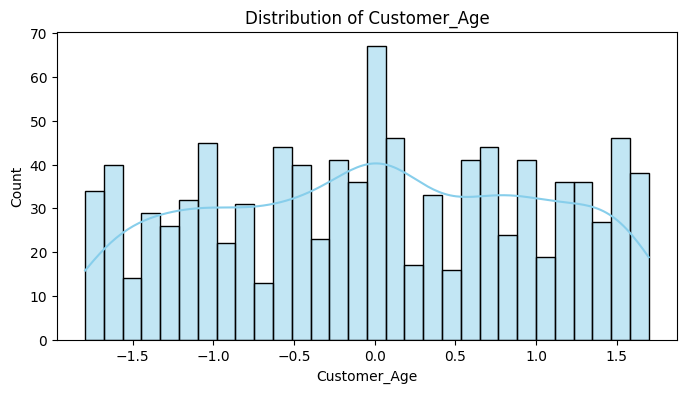

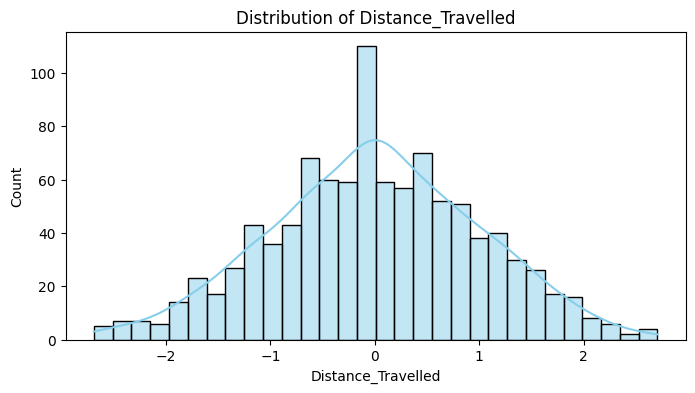

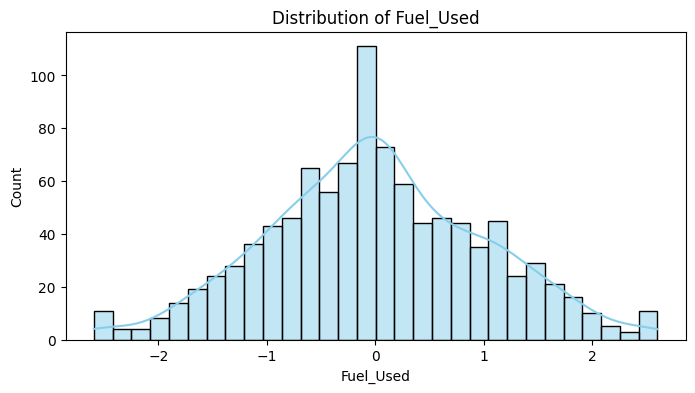

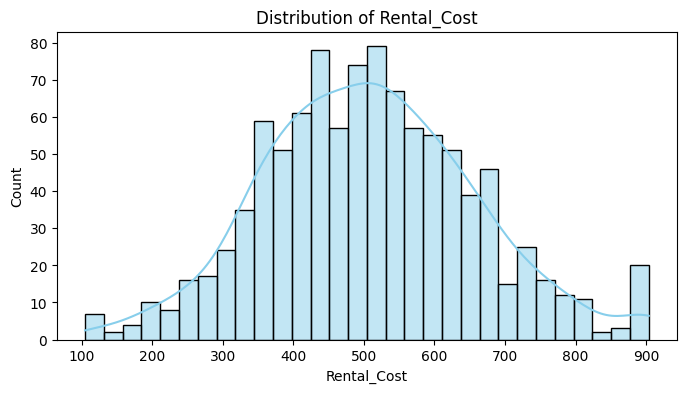

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Rental_Duration', 'Customer_Age', 'Distance_Travelled', 'Fuel_Used', 'Rental_Cost']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## ✅ 8.2 Boxplots (Outliers + Category Impact)
To analyze how categories affect Rental_Cost and see outliers per category:

python
Copy code


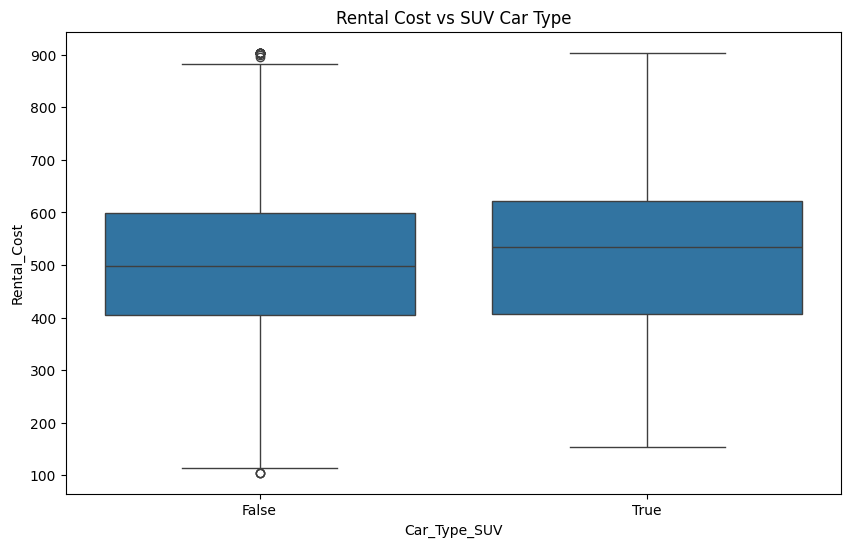

In [102]:
# Example for Car_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car_Type_SUV', y='Rental_Cost', data=df)
plt.title("Rental Cost vs SUV Car Type")
plt.show()


## ✅ 8.4 Pairplot (Multivariate relationships

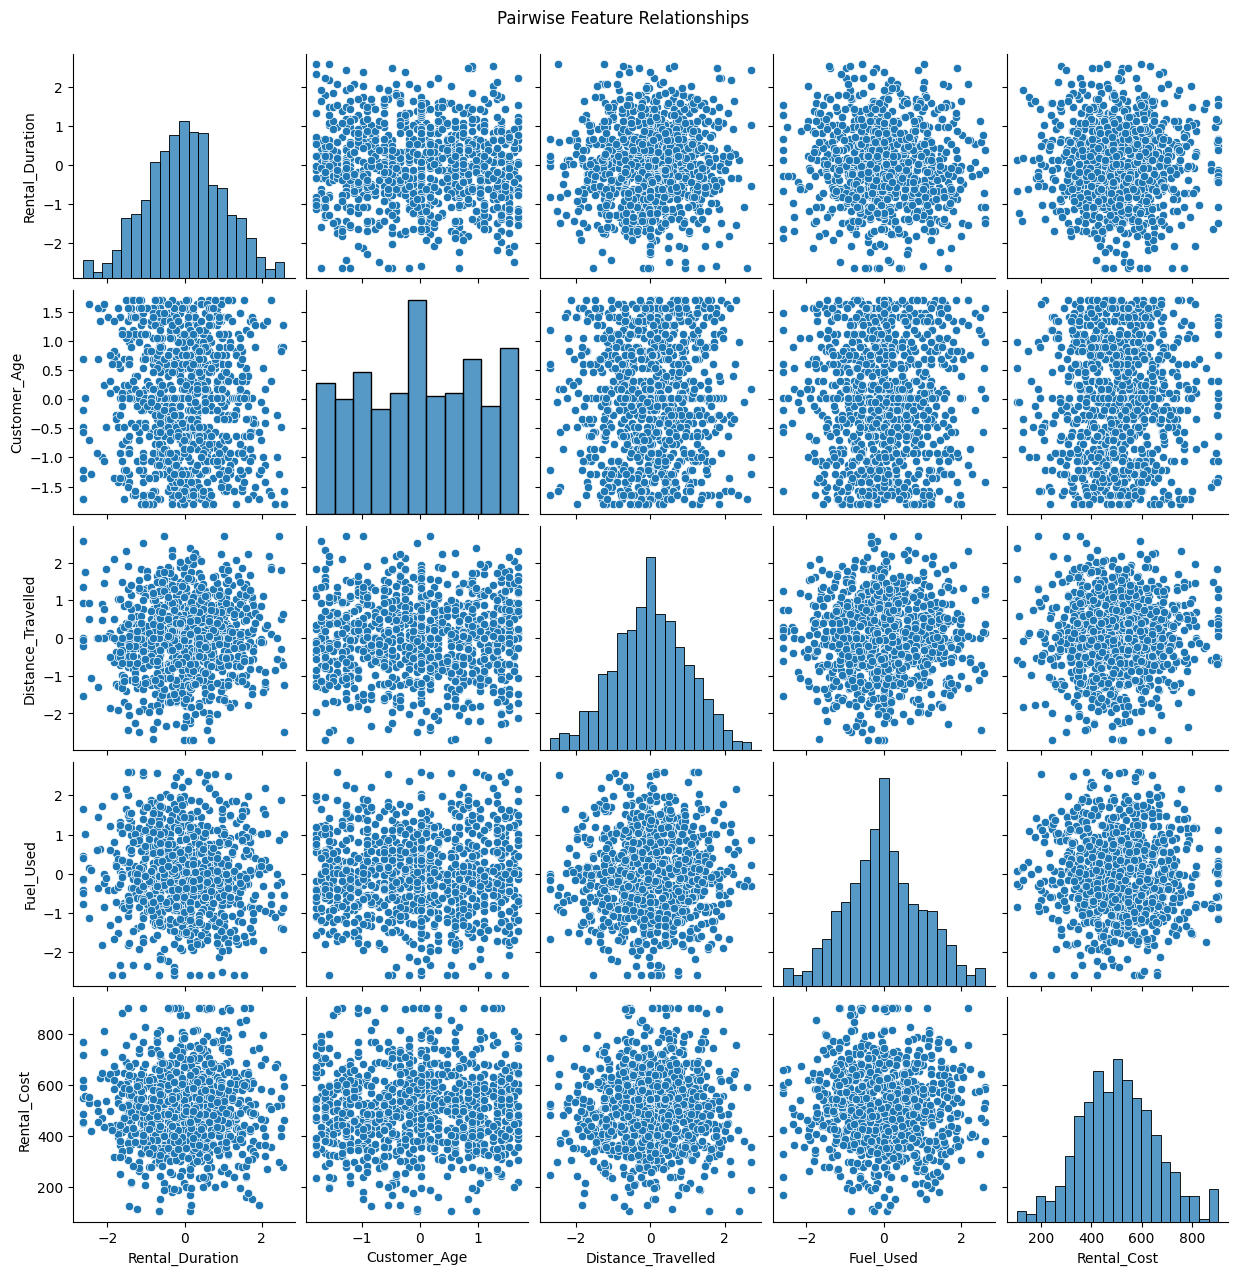

In [103]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


## ✅ 8.5 Rental Cost vs Key Features

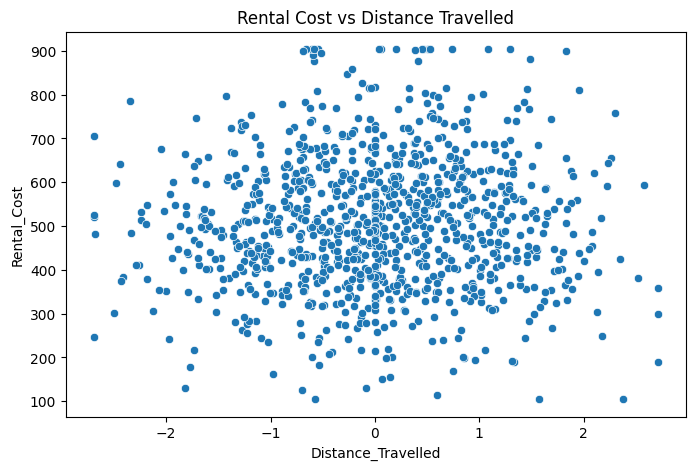

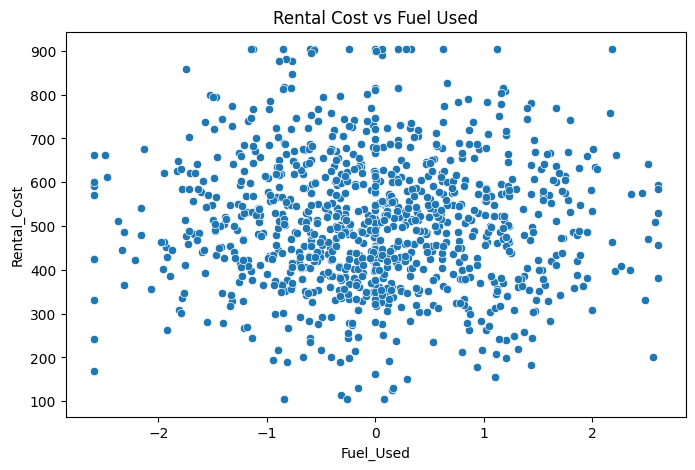

In [104]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance_Travelled', y='Rental_Cost', data=df)
plt.title('Rental Cost vs Distance Travelled')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Fuel_Used', y='Rental_Cost', data=df)
plt.title('Rental Cost vs Fuel Used')
plt.show()


In [105]:
df = df.drop(columns=['Date'], errors='ignore')


In [ ]:
y = df['Rental_Cost']
X = df.drop(columns=['Rental_Cost'])

In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("🔹 Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

🔹 Linear Regression
MAE: 117.82018063685187
MSE: 22353.536025571055
R2 Score: -0.028466182490719527


In [112]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n🔹 Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("MSE:", mean_squared_error(y_test, dt_pred))
print("R2 Score:", r2_score(y_test, dt_pred))



🔹 Decision Tree Regressor
MAE: 150.97850746268657
MSE: 36200.372910199
R2 Score: -0.6655467523841887


In [107]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n🔹 Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))
